In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Importing the dataset
dataset = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

y_actual = pd.read_csv("gender_submission.csv")
y_submission = y_actual.copy()

y_actual.drop('PassengerId', axis=1, inplace=True)


#features = ['Pclass', 'Sex', 'SibSp', 'Parch','Embarked', 'Age']

dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis

   Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         0       3    1  22.0      1      0 -0.499958         2
1         1       1    0  38.0      1      0  0.788503         0
2         1       3    0  26.0      0      0 -0.486376         2
3         1       1    0  35.0      1      0  0.422623         2
4         0       3    1  35.0      0      0 -0.483861         2


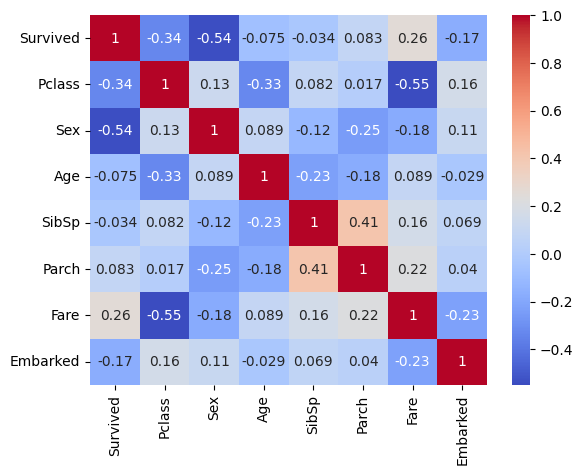

In [23]:
import seaborn as sns
from sklearn.impute import SimpleImputer
def data_cleanup(dataset):
    
# Drop Name, PassengerId, Ticket, Fare
    dataset_clean = dataset.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)
    dataset_clean = dataset_clean.dropna(subset=['Embarked'])
   
# fill null values in Age with the mean
    dataset_clean.fillna({'Age':dataset_clean['Age'].mean()}, inplace=True)
    dataset_clean.fillna({'Fare':dataset_clean['Fare'].mean()}, inplace=True)
# encode the categorical data
    label_encoder = LabelEncoder()
    dataset_clean['Embarked'] = label_encoder.fit_transform(dataset_clean['Embarked'])
    dataset_clean['Sex'] = label_encoder.fit_transform(dataset_clean['Sex']) 

# normalize the fare
    dataset_clean['Fare'] = (dataset_clean['Fare'] - dataset_clean['Fare'].mean()) / dataset_clean['Fare'].std()

    return dataset_clean


dataset_corr = data_cleanup(dataset)
print(dataset_corr.head())
sns.heatmap(dataset_corr.corr(), cmap='coolwarm', annot=True)
plt.show()

## With Age

In [24]:
# list of features
from sklearn.linear_model import LogisticRegression






def train_model_RandomForest(X_train, X_test, y_train, y_test):


# train model with Random Forest Regressor
    model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

# check the accuracy
    accuracy_train = accuracy_score(y_test, y_pred)
# print the accuracy with string interpolation 

    print("Training Accuracy RF :",accuracy_train)
    return model


def train_model_LG( X_train, X_test, y_train, y_test):


# train model with Random Forest Regressor
    model = LogisticRegression(max_iter=1000, random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

# check the accuracy
    accuracy_train = accuracy_score(y_test, y_pred)
    print("Training Accuracy LGR :",accuracy_train)

    return model


dataset_clean = data_cleanup(dataset)
dataset_test_clean = data_cleanup(dataset_test)
#Split the dataset
X = dataset_clean.drop('Survived', axis=1)
y = dataset_clean['Survived']

X_train, X_train_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)    

rf_model = train_model_RandomForest(X_train, X_train_test, y_train, y_test)
lg_model = train_model_LG(X_train, X_train_test, y_train, y_test)

#Test the model
X_actual_test = dataset_test_clean.copy()

#print missing values
print(X_actual_test.isnull().sum())

y_pred_rf = rf_model.predict(X_actual_test)#
y_pred_lg = lg_model.predict(X_actual_test)


y_actual = np.array(y_actual)

accuracy_test_rf = accuracy_score(y_actual, y_pred_rf)
accuracy_test_lg = accuracy_score(y_actual, y_pred_lg)

print("Random Forest Accuracy:",accuracy_test_rf)
print("Logistic Regression Accuracy:",accuracy_test_lg)


y_submission['Survived'] = y_pred_lg
y_submission['Survived'] = y_submission['Survived'].astype('int')

y_submission.to_csv('submission.csv', index=False)



Training Accuracy RF : 0.797752808988764
Training Accuracy LGR : 0.8370786516853933
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Random Forest Accuracy: 0.7918660287081339
Logistic Regression Accuracy: 0.9330143540669856
